In [185]:
import os
import numpy as np
from pathlib import Path
import pypianoroll as ppr
import pretty_midi
from pypianoroll import Multitrack, Track
from matplotlib import pyplot as plt

# Import Data (Bars)

In [6]:
PATH_HOME = str(Path.home())
PATH_TAGS = '/home/herman/lpd/id_lists/tagtraum/tagtraum_Electronic.id'
PATH_FILES = PATH_HOME + '/local_dir/salu133445/git/aicomposer/data/train_x.txt'
PATH = PATH_HOME + '/local_dir/salu133445/git/aicomposer/data/lpd_cleansed_stacked_pianoroll_11_tracks_bar/'

In [89]:
train_x = []
with open(PATH_TAGS, 'r') as f:
    for file in f:
        file = file.rstrip()
        middle = '/'.join(file[2:5]) + '/'
        p = PATH + middle + file
        for npz in os.listdir(p):
            with np.load(p + '/' + npz) as data:
                pianoroll = np.zeros(data['shape'], np.float32)
                pianoroll[tuple(x for x in data['nonzero'])] = True
                train_x.append(pianoroll)

39851


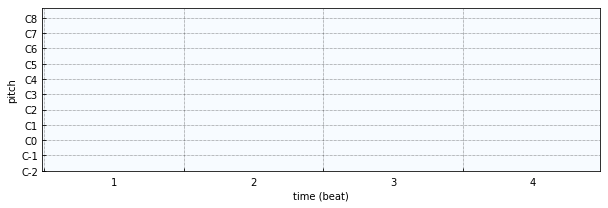

In [159]:
print(len(train_x))
tracks = np.transpose(train_x[1100], (2, 0, 1))

# print(tracks)
tracks = np.concatenate([np.zeros((tracks.shape[0], tracks.shape[1], 44)), tracks], axis=2)
drum_track = tracks[0]
t = Track(pianoroll=drum_track)

fig, axs = t.plot(
    beat_resolution=24
)
fig.set_size_inches(10,3)
plt.show()

(96, 84, 11)
(11, 96, 128)


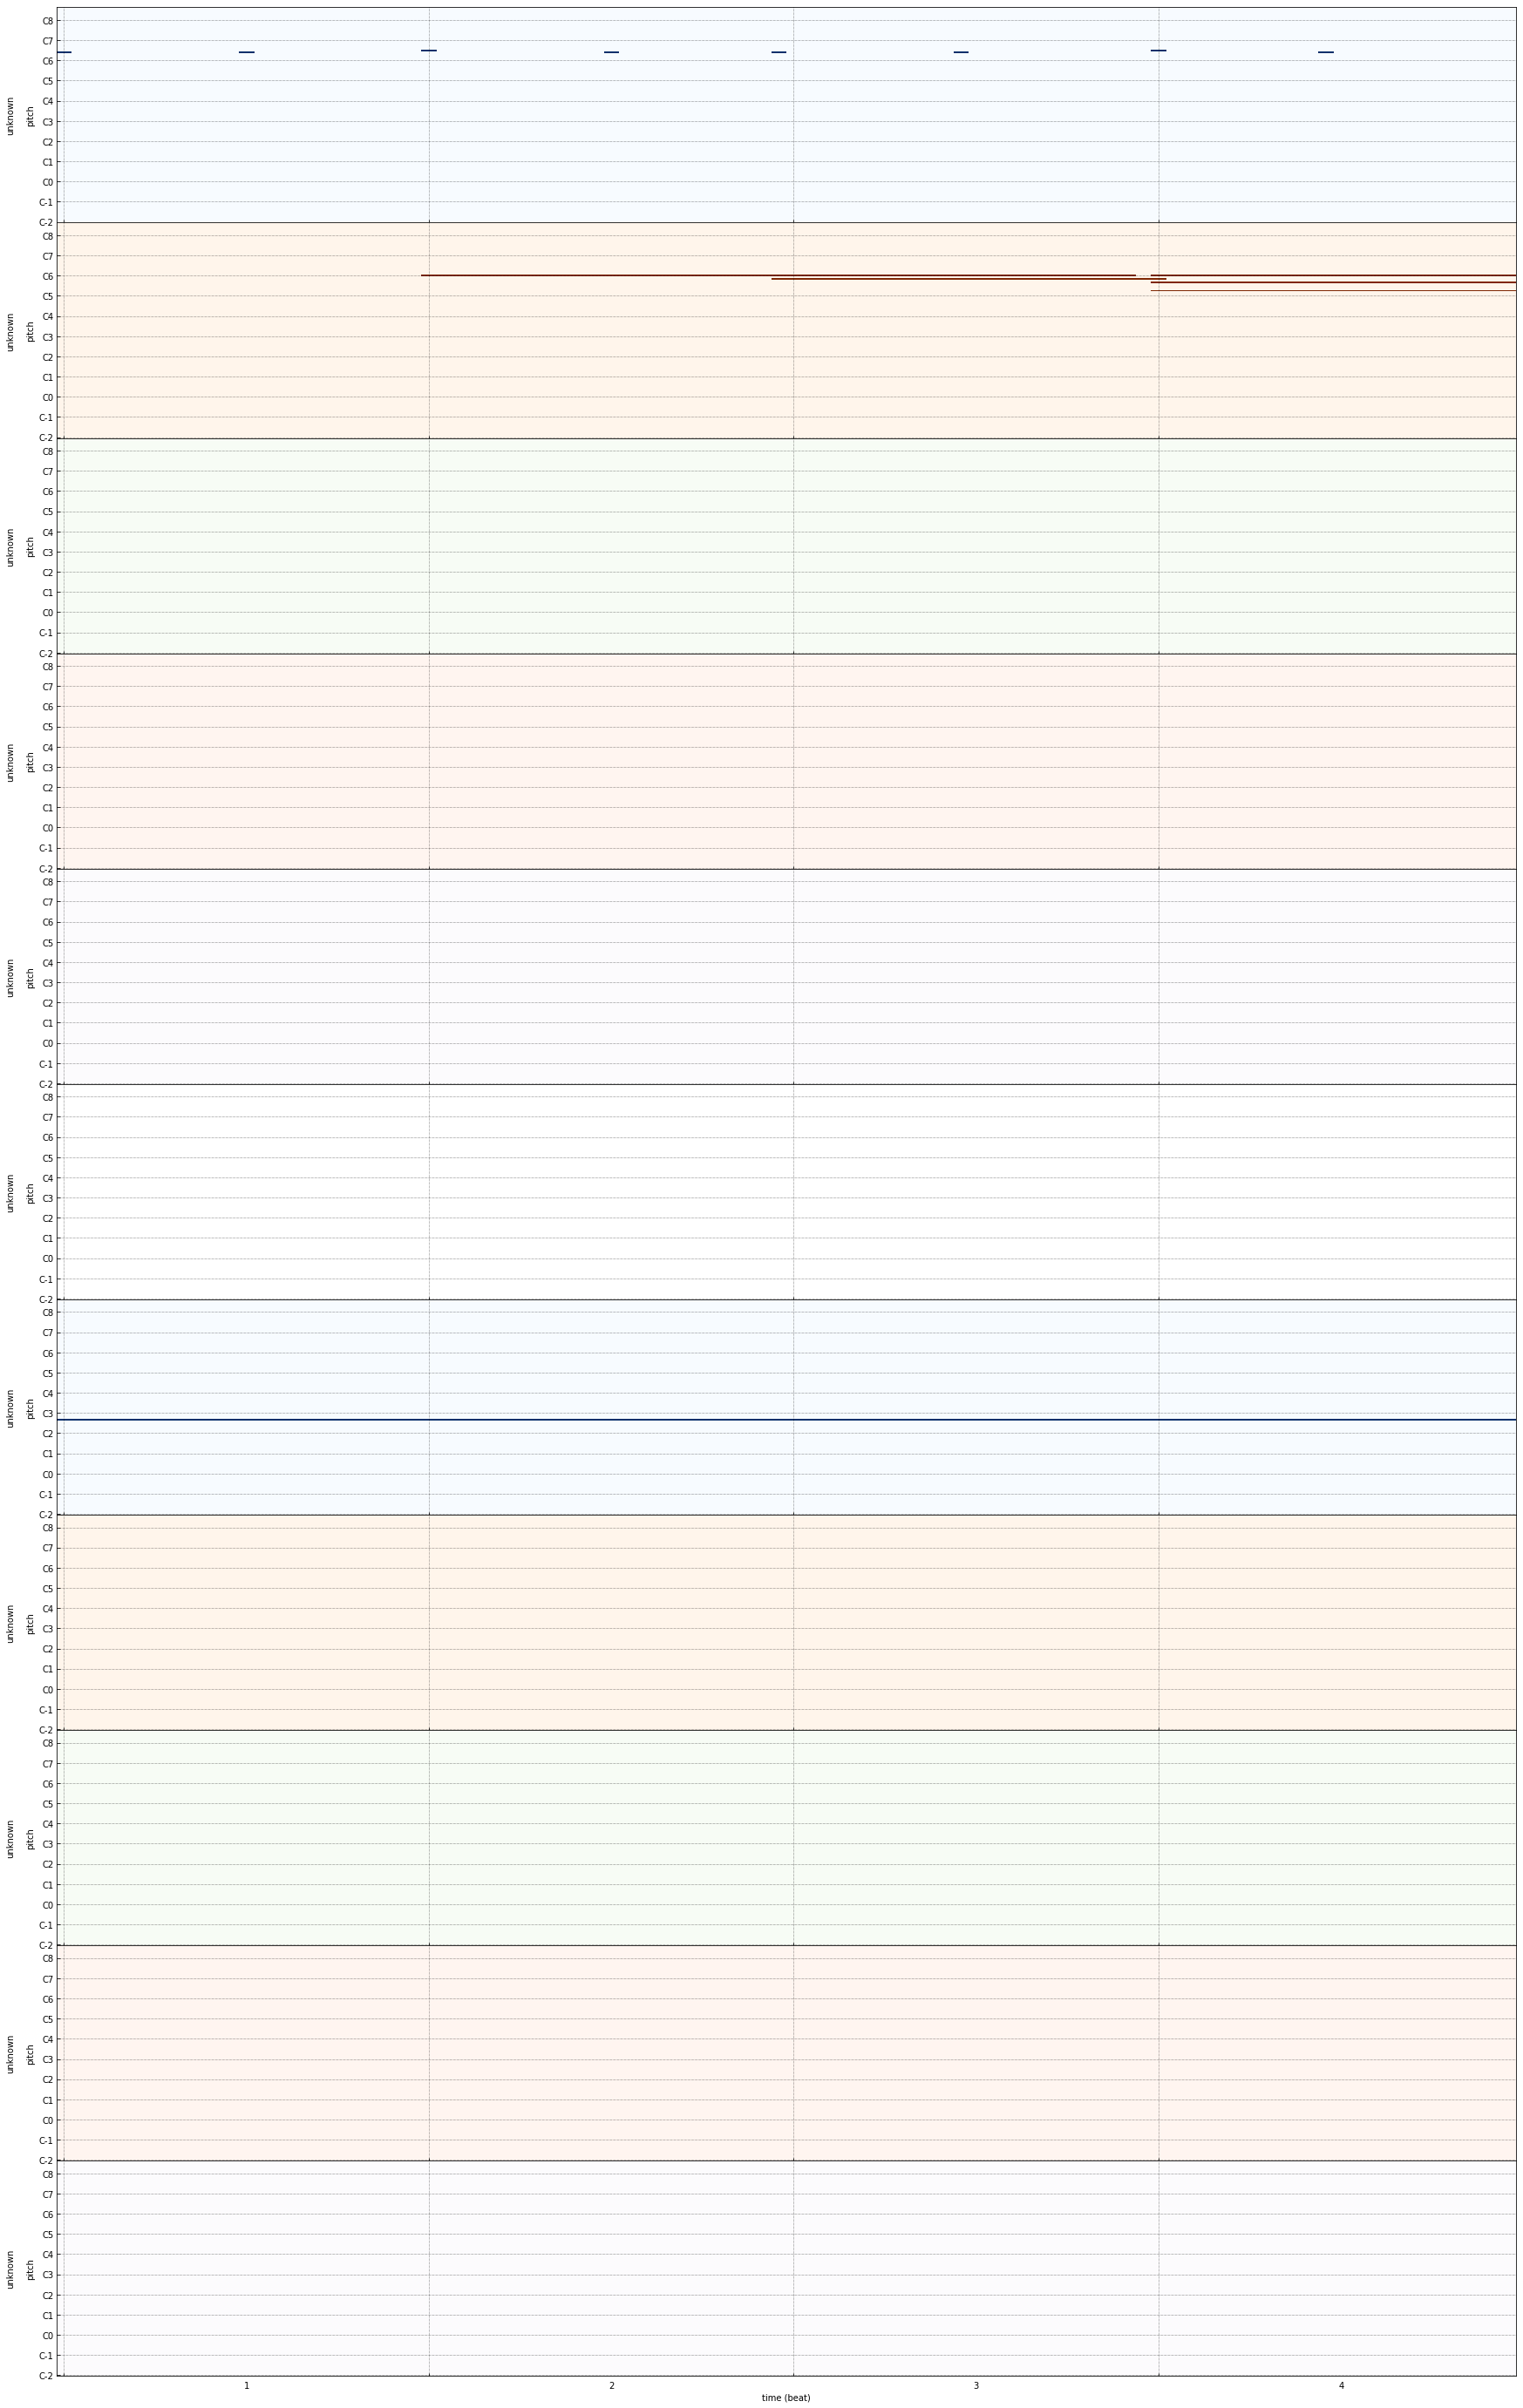

In [120]:
print(train_x[0].shape)
tracks = np.transpose(train_x[3], (2, 0, 1))

# print(tracks)
tracks = np.concatenate([np.zeros((tracks.shape[0], tracks.shape[1], 44)), tracks], axis=2)
arr = []
print(tracks.shape)

for t in tracks:
    t = Track(pianoroll=t)
    arr.append(t)

mt = Multitrack(tracks=arr)
fig, axs = mt.plot()
fig.set_size_inches(30,50)
plt.show()

# Import Data (phrase)

In [186]:
PATH_HOME = str(Path.home())
PATH_TAGS = '/home/herman/lpd/id_lists/tagtraum/tagtraum_Electronic.id'
PATH_FILES = PATH_HOME + '/local_dir/salu133445/git/aicomposer/data/train_x.txt'
PATH = PATH_HOME + '/local_dir/salu133445/git/aicomposer/data/lpd_cleansed_stacked_pianoroll_11_tracks/'

In [187]:
train_x_phr = []
with open(PATH_TAGS, 'r') as f:
    for file in f:
        file = file.rstrip()
        middle = '/'.join(file[2:5]) + '/'
        p = PATH + middle + file
        for npz in os.listdir(p):
            with np.load(p + '/' + npz) as data:
                pianoroll = np.zeros(data['shape'], np.float32)
                pianoroll[tuple(x for x in data['nonzero'])] = True
                train_x_phr.append(pianoroll)

In [188]:
def pltDrumTrack(track):
#     track = track.reshape((-1, 84))
    track = np.append(np.zeros((track.shape[0], 34)), track, axis=1)
    track = np.append(track, np.zeros((track.shape[0], 10)), axis=1)
    track = np.where(track == 1, 128, 0)
    track = Track(pianoroll=track)
    
    fig, axs = track.plot(
        xtick='beat',
        ytick='octave',
        beat_resolution=96,
    )
    fig.set_size_inches(30,10)
    y = axs.set_ylim(34, 81) # C0 - C2
    plt.show()

In [192]:
print(len(train_x_phr))

temp = []
for phr in train_x_phr:
    drum_track = np.transpose(phr[0], (2, 0, 1))[0]
    if np.sum(drum_track) > 0:
        temp.append(phr)

print(len(temp))

352
100


In [201]:
train_x_phr_np = np.vstack(train_x_phr)
train_x_phr_np.shape

(39851, 96, 84, 11)

In [202]:
np.save("./temp/train_x.npy", train_x_phr_np)

In [195]:
for t in train_x_phr:
    print(t.shape)

(44, 96, 84, 11)
(121, 96, 84, 11)
(147, 96, 84, 11)
(17, 96, 84, 11)
(140, 96, 84, 11)
(49, 96, 84, 11)
(45, 96, 84, 11)
(161, 96, 84, 11)
(140, 96, 84, 11)
(109, 96, 84, 11)
(89, 96, 84, 11)
(125, 96, 84, 11)
(123, 96, 84, 11)
(117, 96, 84, 11)
(138, 96, 84, 11)
(122, 96, 84, 11)
(89, 96, 84, 11)
(150, 96, 84, 11)
(138, 96, 84, 11)
(121, 96, 84, 11)
(86, 96, 84, 11)
(136, 96, 84, 11)
(106, 96, 84, 11)
(86, 96, 84, 11)
(93, 96, 84, 11)
(155, 96, 84, 11)
(81, 96, 84, 11)
(139, 96, 84, 11)
(109, 96, 84, 11)
(25, 96, 84, 11)
(26, 96, 84, 11)
(100, 96, 84, 11)
(282, 96, 84, 11)
(121, 96, 84, 11)
(157, 96, 84, 11)
(67, 96, 84, 11)
(179, 96, 84, 11)
(70, 96, 84, 11)
(89, 96, 84, 11)
(119, 96, 84, 11)
(18, 96, 84, 11)
(36, 96, 84, 11)
(260, 96, 84, 11)
(126, 96, 84, 11)
(33, 96, 84, 11)
(64, 96, 84, 11)
(80, 96, 84, 11)
(129, 96, 84, 11)
(119, 96, 84, 11)
(26, 96, 84, 11)
(18, 96, 84, 11)
(124, 96, 84, 11)
(40, 96, 84, 11)
(99, 96, 84, 11)
(38, 96, 84, 11)
(19, 96, 84, 11)
(229, 96, 84, 11)


(140, 96, 84, 11)


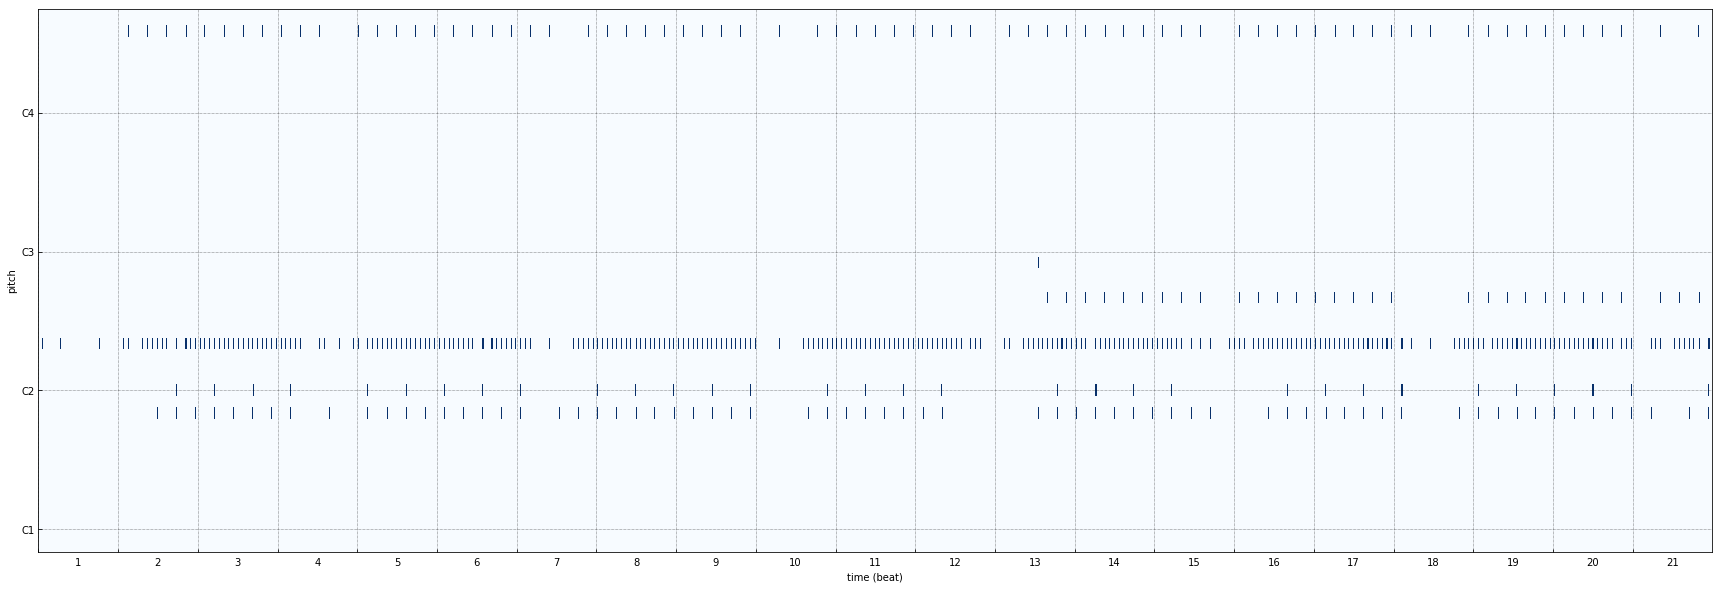

(49, 96, 84, 11)


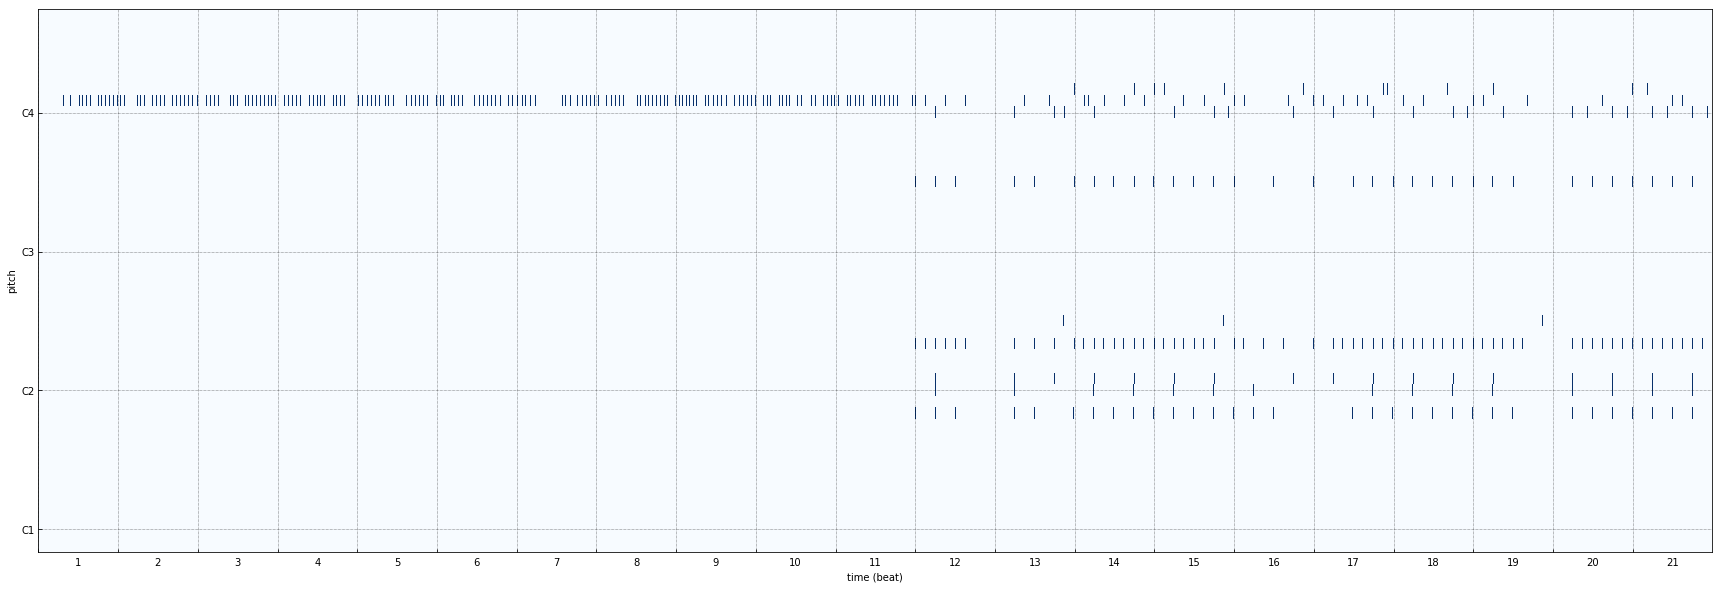

(161, 96, 84, 11)


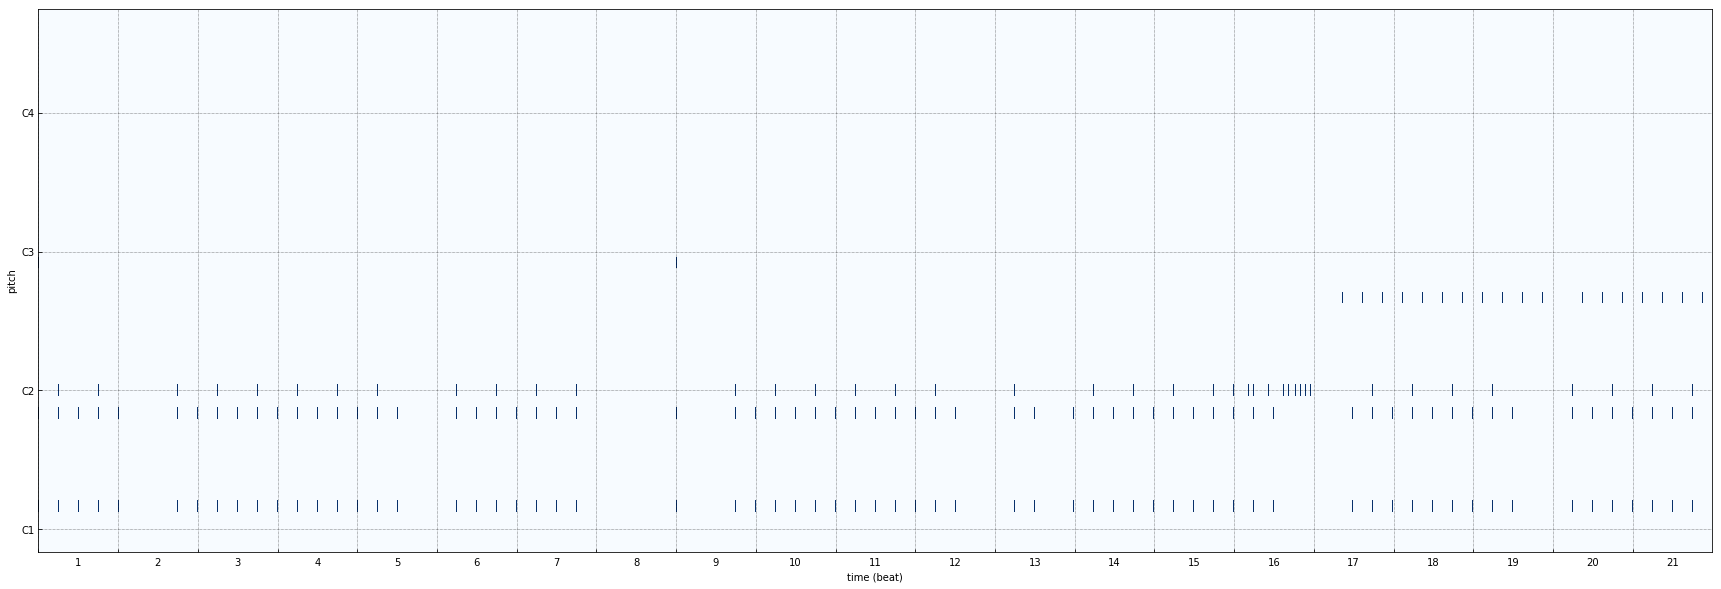

(140, 96, 84, 11)


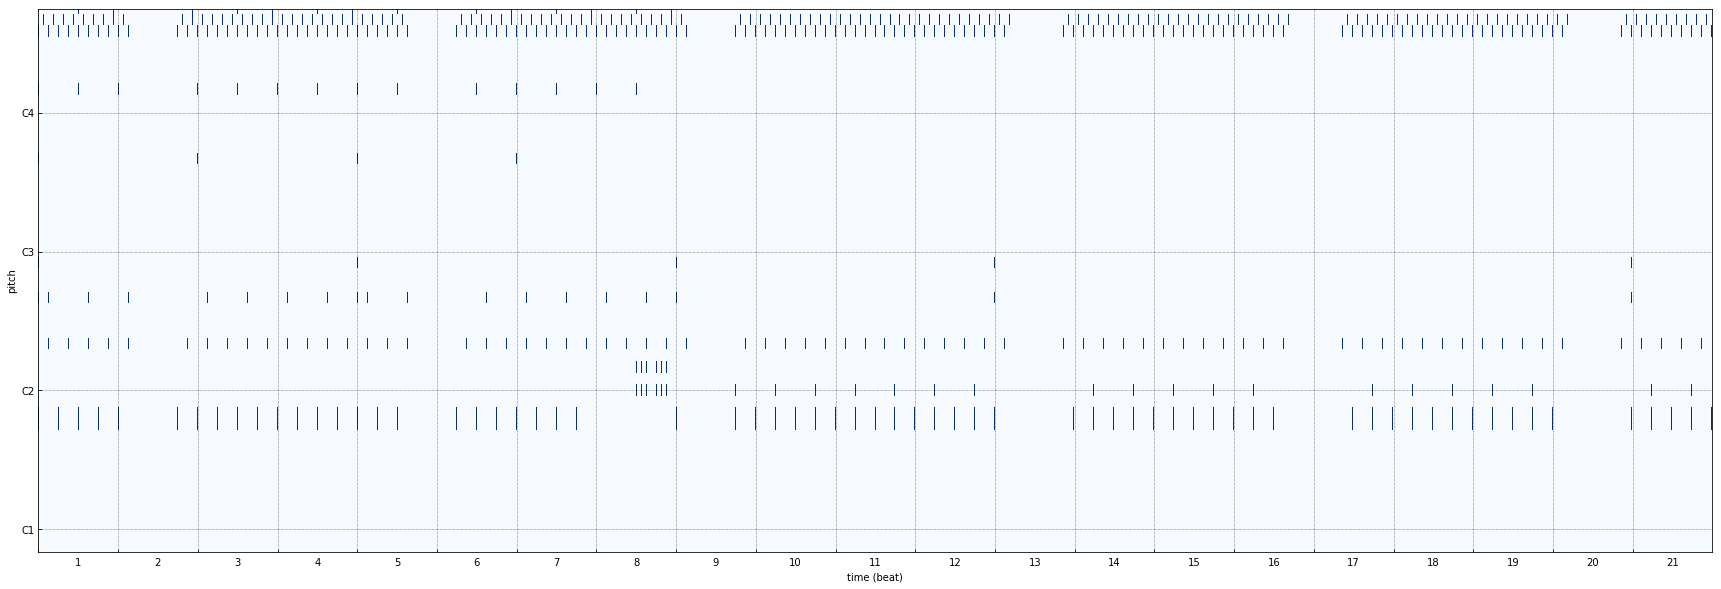

(89, 96, 84, 11)


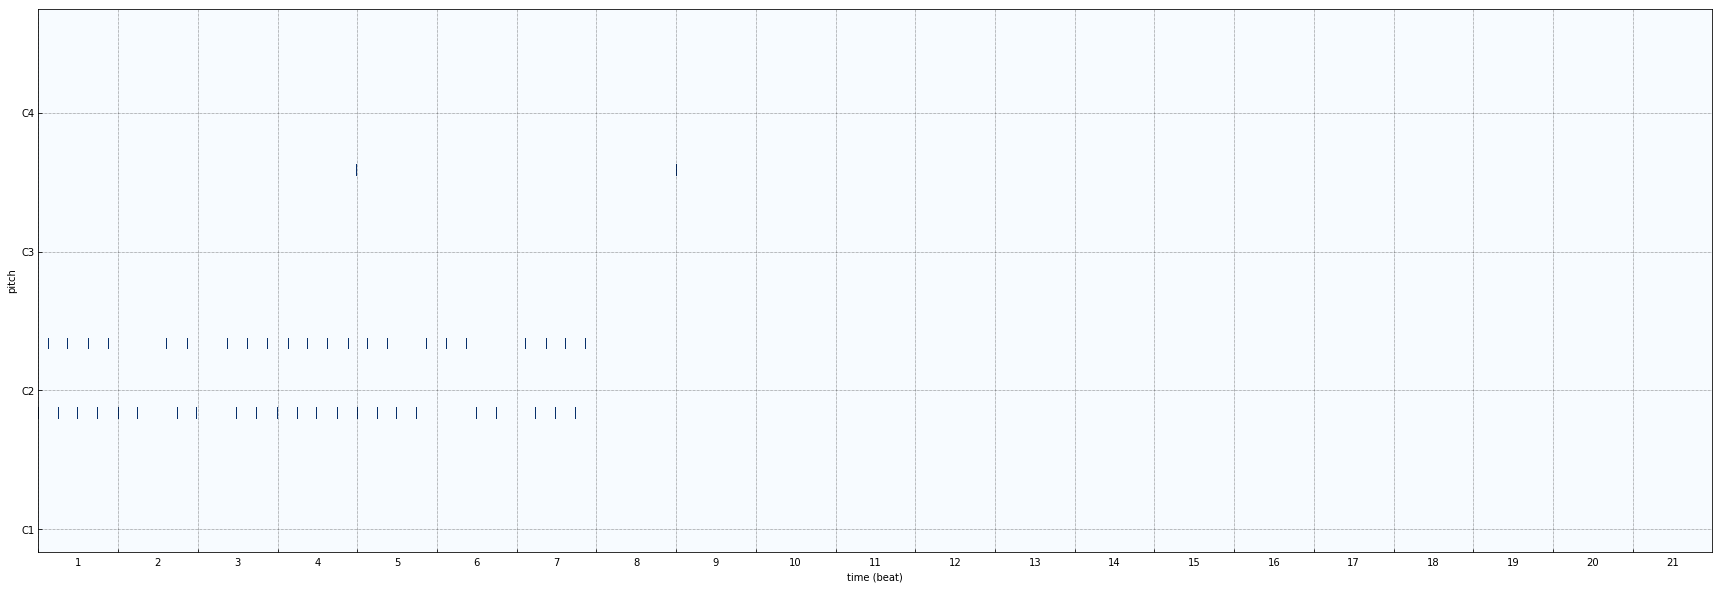

(138, 96, 84, 11)


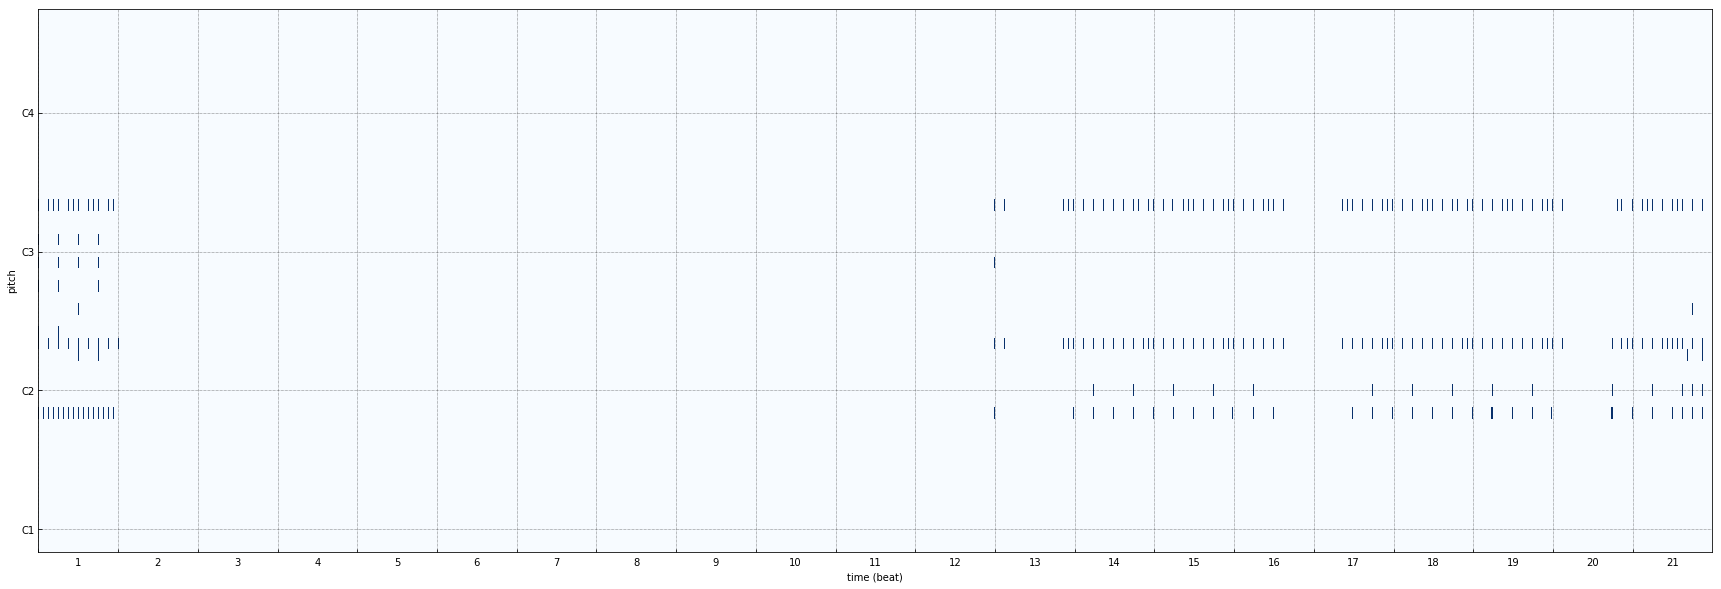

(136, 96, 84, 11)


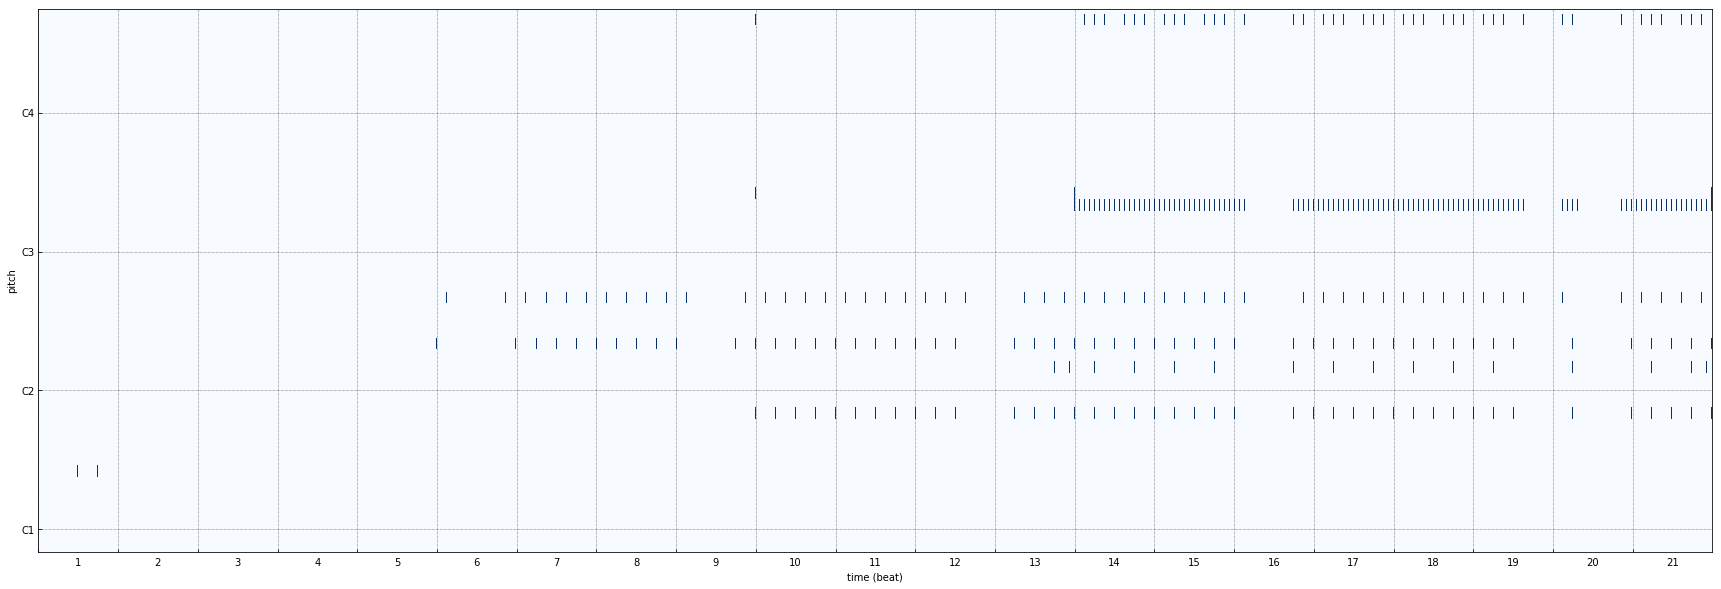

(106, 96, 84, 11)


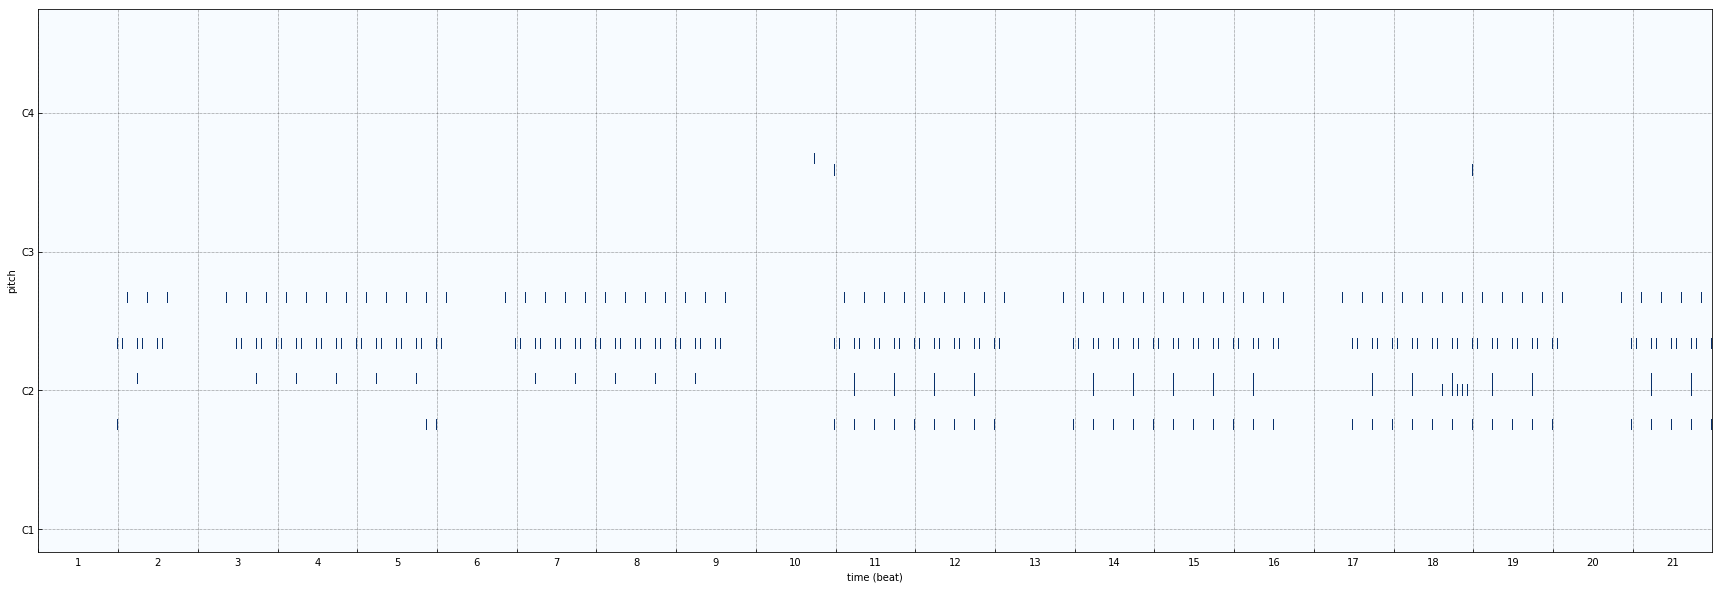

(139, 96, 84, 11)


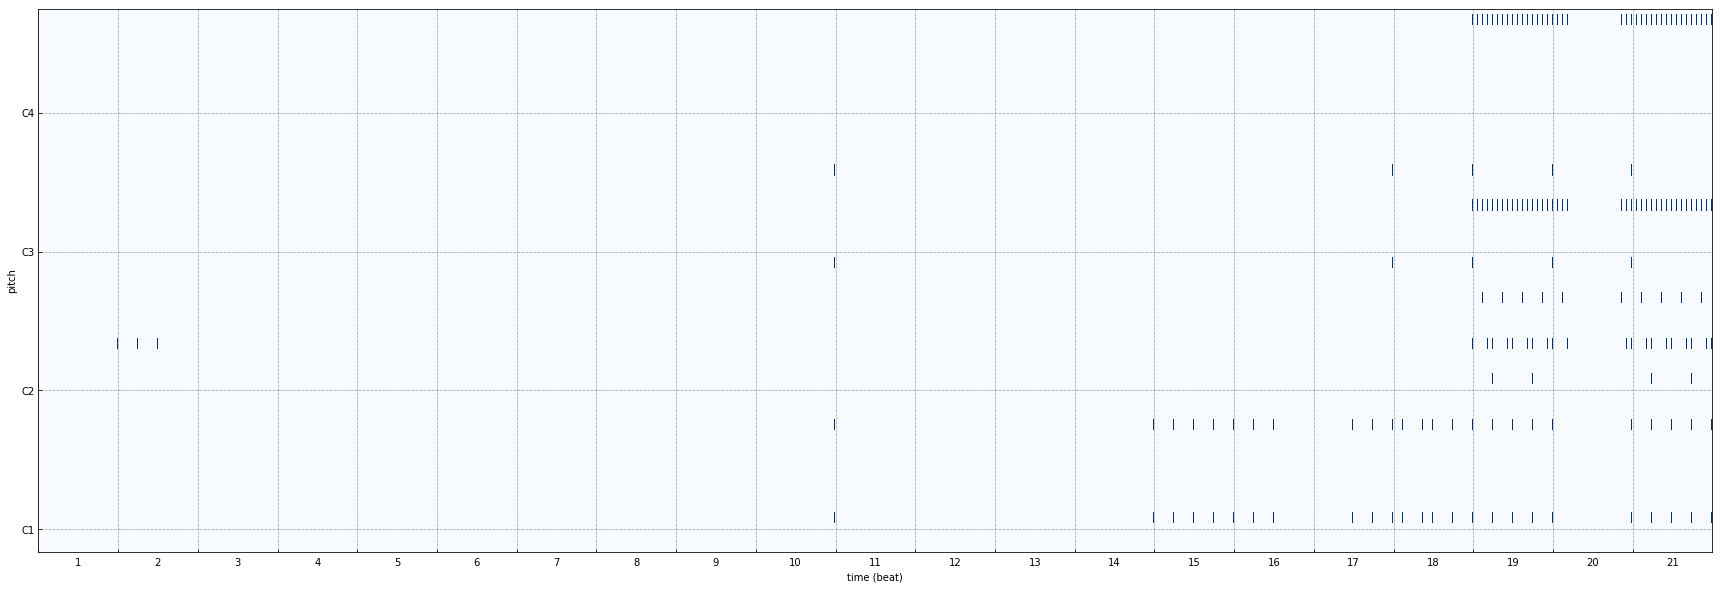

(25, 96, 84, 11)


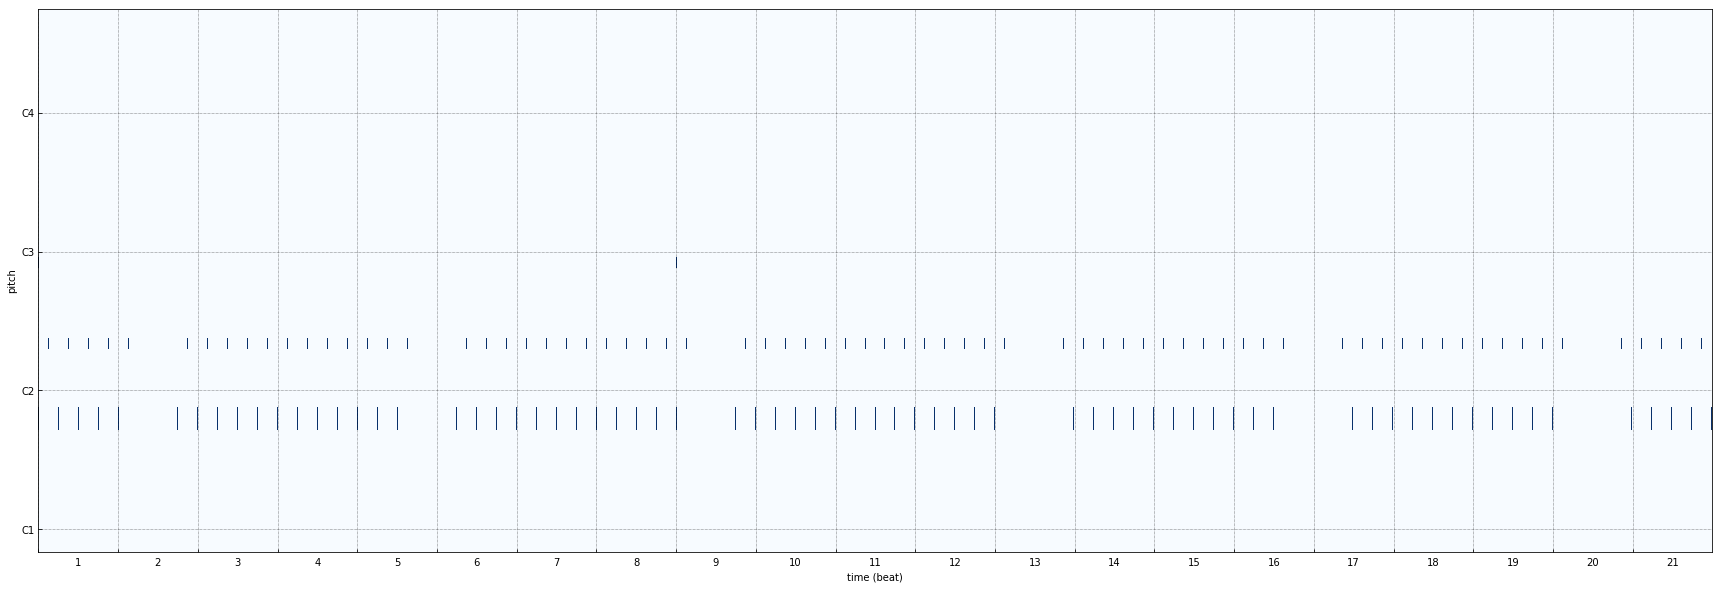

In [183]:
for i in range(10):
    print(temp[i].shape)
    tracks = np.transpose(temp[i][0], (2, 0, 1))
    for j in range(min(temp[i].shape[0]-1, 20)):
        tracks = np.concatenate((tracks, np.transpose(temp[i][j+1], (2, 0, 1))), axis=1)

    pltDrumTrack(tracks[0])

## Load the DATA !!!